In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import time
import SNF
import displayClusters
import affinityMatrix
import numpy as np
import gc
from matplotlib.pyplot import imshow

In [2]:
def read_network(network):

    """ read the different data type's network in
        matrix : col -- different feature
                 row -- different patient
    """
    f = open(network, "r")

    feature_list = [x.replace('"', '') for x in f.readline().strip("\n").split(" ")]
    print feature_list

    feature_specture = []
    for line in f.readlines():
        line = line.strip("\n").replace('"', '')            # not necessary
        feature_specture.append([float(x) for x in line.split(" ")])

    return feature_list, np.array(feature_specture)


class OriginData(object):

    """ initialize similarity network fusion method's parameter
        ** parameters **:
            k : mandatory, integer
                number of neighbours, usually [10, 30]
            alpha : mandatory, integer
                    hyper-parameter, usually [0.3, 0.8], for similarity matrix
            t : mandatory, integer
                number of iterations, usually [10, 100]
    """

    def __init__(self, k=10, a=0.5, t=15):
        self.knn = k
        self.alpha = a
        self.iteration = t
        self.origin_dat = []

    def set_network(self, *args):

        """ *args is list of network to be fused
            for item in args:
            read in all network such as genome expression, methylation, epigenetic
        """

        for item in args:
            feature_type, exp_dat = read_network(item)
            self.origin_dat.append(exp_dat)

    @property
    def K(self):
        return self.knn

    @property
    def eps(self):
        return self.alpha

    @property
    def iterate(self):
        return self.iteration

In [3]:
np.random.seed(0)
SNFmodel = OriginData(20, 0.5, 30)
SNFmodel.set_network('../Data1.dat', '../Data2.dat')

['V1', 'V2']
['V3', 'V4']


In [4]:
start = time.time()
# data = [np.random.rand(15000,15000) for i in range(2)]
# diffs = affinityMatrix.euclidDist(data)
# diffs = [np.ones(shape=(1000,1000)).astype('float32') for i in range(2)]
diffs = affinityMatrix.euclidDist(SNFmodel.origin_dat) # calculate out sample-sample distance

print time.time()-start # 34sec for 15000x15000

INFO (theano.gof.compilelock): Waiting for existing lock by process '29143' (I am process '8078')
INFO:theano.gof.compilelock:Waiting for existing lock by process '29143' (I am process '8078')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/soyeon1771/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.10-64/lock_dir
INFO:theano.gof.compilelock:To manually release the lock, delete /home/soyeon1771/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.10-64/lock_dir


compiled square_x
compiled product_x
compiled square_x
compiled product_x
130.059571028


In [12]:
start = time.time()
Walls = [ affinityMatrix.affinityMatrix(diff, SNFmodel).astype('float32') for diff in diffs ]
# Walls = [np.ones(shape=(15000,15000)).astype('float32') for i in range(2)]

print time.time()-start # 34sec for 15000x15000

0.00580310821533


In [6]:
# import cPickle as pickle
# with open('Walls_15000x15000.pkl', 'wb') as f:
#     pickle.dump(Walls, file=f)
# start = time.time()
# with open('Walls_15000x15000.pkl', 'rb') as f:
#     Walls=pickle.load(f)
    
# print time.time()-start # 152sec for 15000x15000

In [7]:
# start = time.time()
# print SNF.SNF_GPU(Walls, SNFmodel)
# print time.time()-start
start = time.time()
P=SNF.SNF_GPU2(Walls, SNFmodel)
print time.time()-start # 357 sec for 15000x15000
# start = time.time()
#print SNF.SNF(Walls, SNFmodel)
#print time.time()-start
# start = time.time()
# P=SNF.SNF_ORIGINAL(Walls, SNFmodel)
# print time.time()-start # 10 sec for 1000x1000
# start = time.time()
# P=SNF.SNF_GPU_NOSHARE(Walls, SNFmodel)
# print time.time()-start # 102sec for 8000x8000

compile done gpu2
1.67674016953


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[  0  72  71  70  69  68  67  66  65  64  63  62  61  60  59  58  57  56
  55  54  53  52  73  74  75  76  98  97  96  95  94  93  92  91  90  89
  51  88  86  85  84  83  82  81  80  79  78  77  87  50  99  48  21  20
  19  18  17  16  15  14  12  11  10   9   8   7   6   5   4   3   2   1
  49  22  23  13  25  24  46  45  44  43  42  41  39  38  37  36  40  47
  35  27  28  29  30  26  32  33  34  31 163 171 170 169 168 167 166 165
 164 162 151 160 159 158 157 156 155 154 153 152 172 161 173 197 175 150
 196 195 194 193 192 191 190 189 188 174 187 185 184 183 182 181 180 179
 178 177 

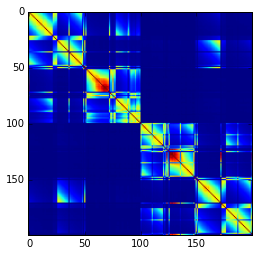

In [9]:
start = time.time()
disp_W, index, cluster, eigDiscrete = displayClusters.displayClusters(P, 2, 2)
print 'time of displayClusters', time.time()-start